In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
import os

import joblib


In [53]:
## Defining set containing all stopwords in english.
stop_words = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

**Importing Libraries and Packages**

In [2]:
import nltk
from nltk.corpus import stopwords
import re
import joblib
from tensorflow.keras.preprocessing.text import Tokenizer
import gensim
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense,Embedding,LSTM,Dropout
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Using TensorFlow backend.


**Reading the Dataset**

In [3]:
df = pd.read_csv("data/Preprocesswithstopword.csv",encoding='latin-1')

In [4]:
df.head()

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,0,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over


**In the Dataset we can see that there is no column names present so we add the column names of the Data.**

In [7]:
df.head()

,sentiment,text,result,clean_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,0,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,0,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,0,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,0,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over


**Replacing the target Values by Positive,Negative and Neutral**

In [5]:
df.sentiment.replace({0:'Negative',4:'Positive'},inplace=True)

In [9]:
df.head()

,sentiment,text,result,clean_text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,Negative,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,Negative,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,Negative,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,Negative,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over


In [9]:
stop_words=set(stopwords.words('english'))
stop_words.remove('not')

In [10]:

corpus=[]
for i in range(0,len(df)):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',df['text'][i])
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    review=' '.join(review)
    corpus.append(review)

**Replacing the text column with preprocessed text**

In [6]:
df['clean_text']=df['clean_text'].values.astype('U')

In [7]:
df.head()

,sentiment,text,result,clean_text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en,aww bummer shoulda got david carr third day EM...
1,Negative,is upset that he can't update his Facebook by ...,en,upset update facebook texting might cry result...
2,Negative,@Kenichan I dived many times for the ball. Man...,en,dived many time ball managed save 50 rest go b...
3,Negative,my whole body feels itchy and like its on fire,en,whole body feel itchy like fire
4,Negative,"@nationwideclass no, it's not behaving at all....",en,no not behaving mad see over


**Splitting the Data into Training and Test set**

In [8]:
from sklearn.model_selection import train_test_split
train_df,test_df=train_test_split(df,test_size=0.20,random_state=0)

In [9]:
train_df.head()

,sentiment,text,result,clean_text
1252503,Positive,@yourfallenangel i'm proud of u baby. I'm sure...,en,proud baby sure first week hardest ur doin great
352927,Negative,"@roseamyy yup, di kantin. ehm.. emg seh kt ank...",en,yup di kantin ehm emg seh kt ank2 gw msti move...
1303197,Positive,@DSEllis That is why you burn it and THEN send...,en,burn send back
992489,Positive,@mattflener you said the &quot;q&quot; word. N...,en,said quot quot word done
1466018,Positive,"@LoOpzEe lol awww thank you! i try. nah, but i...",en,lol aww thank try nah but didnt wanna offend a...


In [10]:
test_df.head()


,sentiment,text,result,clean_text
1176740,Positive,Why doesn't Aisha go to bloody bed properly??!...,en,doesn aisha go bloody bed properly
1202809,Positive,Going to sleep now. This is the earliest I've ...,en,going sleep earliest bed last week
963264,Positive,Listening to my favorite music on my computer ...,en,listening favorite music computer downloading
178953,Negative,aghh so tired...and i gotta get up early tomor...,en,aghh tired gotta get early tomorrow
889618,Positive,Gonna grab a coffee (need something to keep my...,en,gonna grab coffee need something keep awake co...


**Word2Vec Model**

In [11]:
documents = [text.split() for text in train_df.clean_text]

In [12]:
w2v_model = gensim.models.word2vec.Word2Vec(size=300, 
                                            window=7, 
                                            min_count=10, 
                                            workers=8)

In [13]:
w2v_model.build_vocab(documents)

In [14]:
words = w2v_model.wv.vocab.keys()
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 25572


In [15]:
w2v_model.train(documents, total_examples=len(documents), epochs=30)

(238419743, 269242800)

In [16]:
w2v_model.wv.most_similar("good")

[('great', 0.6952604055404663),
 ('bad', 0.5660150051116943),
 ('nice', 0.5045737028121948),
 ('rough', 0.48169583082199097),
 ('fantastic', 0.45908331871032715),
 ('wonderful', 0.45311880111694336),
 ('gud', 0.44577205181121826),
 ('fabulous', 0.4272128641605377),
 ('fab', 0.42682164907455444),
 ('awesome', 0.42532774806022644)]

In [17]:
w2v_model.wv.most_similar("hate")

[('suck', 0.5401554107666016),
 ('stupid', 0.47763964533805847),
 ('hating', 0.4510836601257324),
 ('dislike', 0.4372982382774353),
 ('h8', 0.42532721161842346),
 ('ugh', 0.4220932424068451),
 ('annoying', 0.42063939571380615),
 ('EMOJIshocked', 0.37794554233551025),
 ('sometimes', 0.37620028853416443),
 ('horrible', 0.37496381998062134)]

In [18]:
w2v_model.wv.most_similar("great")

[('fantastic', 0.7150102257728577),
 ('good', 0.6952604055404663),
 ('wonderful', 0.6862983703613281),
 ('awesome', 0.6796587705612183),
 ('fabulous', 0.6401852965354919),
 ('fab', 0.6208518743515015),
 ('amazing', 0.6143423318862915),
 ('nice', 0.5793014764785767),
 ('excellent', 0.5742321610450745),
 ('lovely', 0.5486046671867371)]

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df.clean_text)

In [20]:
tokenizer.word_index

{'but': 1,
 'not': 2,
 'day': 3,
 'good': 4,
 'get': 5,
 'go': 6,
 'like': 7,
 'no': 8,
 'quot': 9,
 'today': 10,
 'work': 11,
 'love': 12,
 'time': 13,
 'going': 14,
 'got': 15,
 'lol': 16,
 'one': 17,
 'back': 18,
 'know': 19,
 'really': 20,
 'im': 21,
 'don': 22,
 'amp': 23,
 'want': 24,
 'see': 25,
 'night': 26,
 'think': 27,
 'still': 28,
 'new': 29,
 'well': 30,
 'need': 31,
 'home': 32,
 'thanks': 33,
 'oh': 34,
 'off': 35,
 'much': 36,
 'last': 37,
 'morning': 38,
 'miss': 39,
 'tomorrow': 40,
 'make': 41,
 'hope': 42,
 'great': 43,
 'twitter': 44,
 'feel': 45,
 'wish': 46,
 'haha': 47,
 'come': 48,
 'right': 49,
 'sad': 50,
 'fun': 51,
 'week': 52,
 'sleep': 53,
 'would': 54,
 'thing': 55,
 'tonight': 56,
 'bad': 57,
 'sorry': 58,
 'happy': 59,
 'friend': 60,
 'way': 61,
 'though': 62,
 'getting': 63,
 'gonna': 64,
 'over': 65,
 'look': 66,
 'nice': 67,
 'watching': 68,
 'better': 69,
 'wait': 70,
 'bed': 71,
 'could': 72,
 'yeah': 73,
 'school': 74,
 'hate': 75,
 'say': 76,
 

In [21]:
vocab_size=len(tokenizer.word_index)+1
vocab_size

203777

In [22]:
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df.clean_text), maxlen=300)
X_train

array([[   0,    0,    0, ...,  143, 1098,   43],
       [   0,    0,    0, ...,    1,  411,  200],
       [   0,    0,    0, ..., 1199,  363,   18],
       ...,
       [   0,    0,    0, ...,    3,   11,  543],
       [   0,    0,    0, ...,   45,   69, 1119],
       [   0,    0,    0, ...,  858,  117, 6094]])

In [23]:
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df.clean_text), maxlen=300)
X_test

array([[   0,    0,    0, ...,  919,   71, 1777],
       [   0,    0,    0, ...,   71,   37,   52],
       [   0,    0,    0, ...,  216,  341, 1822],
       ...,
       [   0,    0,    0, ...,   46,  710,   16],
       [   0,    0,    0, ...,  205,  160,   47],
       [   0,    0,    0, ...,    7,  373,  216]])

In [24]:
y_train=train_df.sentiment
y_train.head()

1252503    Positive
352927     Negative
1303197    Positive
992489     Positive
1466018    Positive
Name: sentiment, dtype: object

In [25]:
y_test=test_df.sentiment
y_test.head()

1176740    Positive
1202809    Positive
963264     Positive
178953     Negative
889618     Positive
Name: sentiment, dtype: object

**Encoding the Categorical target into 0 and 1**

In [26]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test=labelencoder.fit_transform(y_test)

In [27]:
y_train.shape

(1189590,)

In [28]:
y_test.shape

(297398,)

**Embedding Matrix**

In [29]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)

(203777, 300)


In [30]:
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


**Build Model using LSTM**

In [31]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          61133100  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 61,293,601
Trainable params: 160,501
Non-trainable params: 61,133,100
_________________________________________________________________


**Compile Model**

In [32]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


**Fitting the Model**

In [33]:
model_history=model.fit(X_train, y_train,batch_size=1024,epochs=3,validation_split=0.3,verbose=1)

Train on 832713 samples, validate on 356877 samples
Epoch 1/3
832713/832713 [==============================] - 28352s 34ms/sample - loss: 0.4915 - acc: 0.7611 - val_loss: 0.4435 - val_acc: 0.7939
Epoch 2/3
832713/832713 [==============================] - 17610s 21ms/sample - loss: 0.4593 - acc: 0.7815 - val_loss: 0.4356 - val_acc: 0.7992
Epoch 3/3
832713/832713 [==============================] - 27957s 34ms/sample - loss: 0.4506 - acc: 0.7864 - val_loss: 0.4293 - val_acc: 0.8021


In [36]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

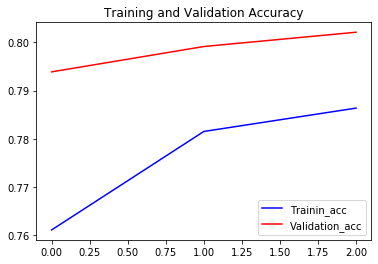

In [37]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

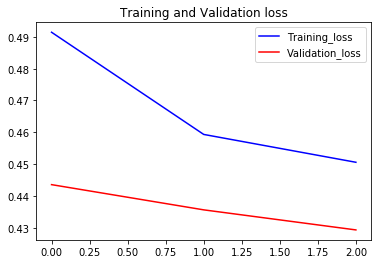

In [38]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

**Preprocessing of tweets given by user**

In [47]:
def preprocess(text):
    review=re.sub('@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+',' ',text)
    review=review.lower()
    review=review.split()
    review=[word for word in review if not word in stop_words]
    print(review)
    review=pad_sequences(tokenizer.texts_to_sequences([review]), maxlen=300)
    return review

**Prediction**

In [48]:
def prediction(review):
    review=preprocess(review)
    score=model.predict(review)
    score=score[0]
    if score<0.4:
        print("Negative")
    elif score>0.4 and score<0.6:
        print("Neutral")
    else:
        print("Positive")
    print(score)


In [56]:
prediction("the food is not bad")

['food', 'not', 'bad']
Negative
[0.39018047]


In [57]:
prediction("the film was horrible")

['film', 'horrible']
Negative
[0.02263518]


In [58]:
scores = model.predict(X_test, verbose=1, batch_size=1024)

297398/297398 [==============================] - 1282s 4ms/sample


In [60]:
scores

array([[0.04924372],
       [0.10804072],
       [0.9581965 ],
       ...,
       [0.5028426 ],
       [0.8277798 ],
       [0.9287384 ]], dtype=float32)

In [61]:
y_pred=np.where(scores>0.5,1,0)

In [62]:
y_pred

array([[0],
       [0],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [63]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

**Evaluation Using Confusion Matrix, accuracy_score and classification report**

In [64]:

cm=confusion_matrix(y_pred,y_test)
print(cm)


[[122604  32247]
 [ 26454 116093]]


In [65]:
print(accuracy_score(y_pred,y_test))

0.8026180404710186


In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.81    149058
           1       0.81      0.78      0.80    148340

    accuracy                           0.80    297398
   macro avg       0.80      0.80      0.80    297398
weighted avg       0.80      0.80      0.80    297398



In [69]:
file = open('output/w2v_model.pkl','wb')
pickle.dump(w2v_model, file)
file.close()
file = open('output/tokenizer.pkl','wb')
pickle.dump(tokenizer, file)
file.close()
file = open('output/final_model.pkl','wb')
pickle.dump(model, file)
file.close()

TypeError: can't pickle _thread.RLock objects

In [81]:
model.save('modellstm2.h5')

**Saving the Trained Models**

In [74]:
joblib.dump(w2v_model,'word2vec.pkl')
joblib.dump(tokenizer,'tokenizer.pkl')
joblib.dump(model,'final_model.pkl')

TypeError: can't pickle _thread.RLock objects

In [83]:
from tensorflow.keras.models import load_model
model = load_model('modellstm2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [85]:
model.compile

<bound method no_automatic_dependency_tracking.<locals>._method_wrapper of <tensorflow.python.keras.engine.sequential.Sequential object at 0x0000021785263888>>